In [2]:
from PIL import Image
from IPython.display import display
import numpy as np

# you may want to keep logging enabled when doing your own work
import logging
import tensorflow as tf
tf.get_logger().setLevel(logging.ERROR) # disable Tensorflow warnings for this tutorial
import warnings
warnings.simplefilter("ignore") # disable Keras warnings for this tutorial
import keras
from keras.applications import mobilenet_v2

import eli5

In [2]:
model = mobilenet_v2.MobileNetV2(include_top=True, weights='imagenet', classes=1000)

# check the input format
print(model.input_shape)
dims = model.input_shape[1:3] # -> (height, width)
print(dims)

(None, 224, 224, 3)
(224, 224)


<class 'PIL.PngImagePlugin.PngImageFile'>


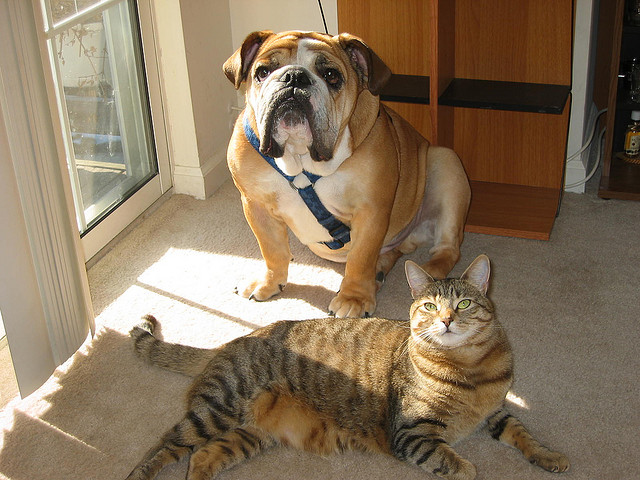

In [6]:
# we start from a path / URI.
# If you already have an image loaded, follow the subsequent steps
image_uri = 'cat_n_dog.png'

# this is the original "cat dog" image used in the Grad-CAM paper
# check the image with Pillow
im = Image.open(image_uri)
print(type(im))
display(im)

<PIL.Image.Image image mode=RGB size=224x224 at 0x2E182DF8F60>


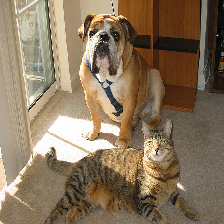

In [7]:
# we could resize the image manually
# but instead let's use a utility function from `keras.preprocessing`
# we pass the required dimensions as a (height, width) tuple
im = keras.preprocessing.image.load_img(image_uri, target_size=dims) # -> PIL image
print(im)
display(im)

In [8]:
# we use a routine from `keras.preprocessing` for that as well
# we get a 'doc', an object almost ready to be inputted into the model

doc = keras.preprocessing.image.img_to_array(im) # -> numpy array
print(type(doc), doc.shape)

<class 'numpy.ndarray'> (224, 224, 3)


In [9]:
# dimensions are looking good
# except that we are missing one thing - the batch size

# we can use a numpy routine to create an axis in the first position
doc = np.expand_dims(doc, axis=0)
print(type(doc), doc.shape)

<class 'numpy.ndarray'> (1, 224, 224, 3)


In [10]:
# `keras.applications` models come with their own input preprocessing function
# for best results, apply that as well

# mobilenetv2-specific preprocessing
# (this operation is in-place)
mobilenet_v2.preprocess_input(doc)
print(type(doc), doc.shape)

<class 'numpy.ndarray'> (1, 224, 224, 3)


<PIL.Image.Image image mode=RGB size=224x224 at 0x2E182E0F2B0>


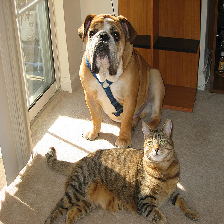

In [11]:
# take back the first image from our 'batch'
image = keras.preprocessing.image.array_to_img(doc[0])
print(image)
display(image)

In [12]:
# make a prediction about our sample image
predictions = model.predict(doc)
print(type(predictions), predictions.shape)

<class 'numpy.ndarray'> (1, 1000)


In [13]:
# check the top 5 indices
# `keras.applications` contains a function for that

top = mobilenet_v2.decode_predictions(predictions)
top_indices = np.argsort(predictions)[0, ::-1][:5]

print(top)
print(top_indices)

40960/35363 [==================================] - 0s 2us/step
[[('n02108422', 'bull_mastiff', 0.8096746), ('n02108089', 'boxer', 0.09836036), ('n02123045', 'tabby', 0.006650376), ('n02123159', 'tiger_cat', 0.0048087104), ('n02110958', 'pug', 0.0039409692)]]
[243 242 281 282 254]


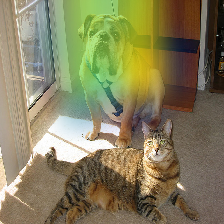

In [14]:
# we need to pass the network
# the input as a numpy array
eli5.show_prediction(model, doc)

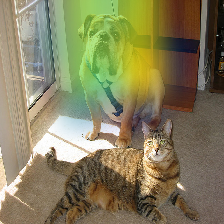

In [15]:
eli5.show_prediction(model, doc, image=image)

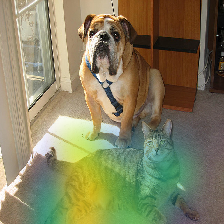

In [16]:
cat_idx = 282 # ImageNet ID for "tiger_cat" class, because we have a cat in the picture
eli5.show_prediction(model, doc, targets=[cat_idx]) # pass the class id